## 计算

调用calculate_real_from_csv()计算策略之前协方差。

调用Y5_matrix_X()计算Y5矩阵的实耦合。无需参数

计算实耦合与协方差之间的相关系数

In [11]:
import pandas as pd
from calculate import *
from from_eigenvector_out_XY import *

#A5 = Matrix([[0, 3, 4, 11, 11],
#             [5, 0, 2, 11, 12],
#             [2, 5, 0, 9, 12],
#             [6, 10, 10, 0, 3],
#             [10, 10, 10, 4, 0]])

#the csv file path
Y5_csv_name = '.\\data\\Y5_Strategy_distributions.csv'

#the start for calculating , The data before the start_round will be truncated when calculating
start_round = 500

#calculate_real_from_csv(csv_name,start_round):
sum_lst = calculate_real_from_csv(Y5_csv_name,start_round)
print("csv result :",sum_lst)

#A5_matrix_X(a_value,mode_col):
xmn1 = Y5_matrix_X()
print("eigen vector result :",xmn1)

#calculate the correlation coefficient
data = pd.DataFrame(sum_lst,columns=['A'])
data['B']=xmn1
cor1 = data.A.corr(data.B)

print("the correlation coefficient is :" ,cor1)

result = pd.DataFrame()
result['from_csv'] = sum_lst
result['from_matrix'] = xmn1
result.to_csv('.\\result\\Y5_result.csv')


csv result : [2.9699548588249494e-06, -8.055713878597927e-07, -1.5016735837457805e-06, -6.688324849402007e-07, 6.122597720802772e-09, 3.23862448940817e-06, -1.9207751496152837e-06, 4.621449605775443e-08, -5.584924479908829e-07, 3.692158314307252e-06, -7.744674613391502e-07, 5.04757880392951e-07, 4.585265352148745e-06, -3.1881799019270967e-06, 3.2357918718042458e-06]
eigen vector result : [0.5653071059223417, 0.07995244435363222, -0.6292088129864001, 0.14467405784568063, -0.16072440525378923, 0.8644739172076765, -0.7875824527152797, -0.43919124096502965, 0.28234499927497486, 1.272357523552386, 0.2153465325929679, -0.07091126905861196, 0.28466821673883996, -0.20549617987956587, 0.1547858901685497]
the correlation coefficient is : 0.7112050815405423


## 数据分析

进行线性回归,绘制协方差和实耦合之间的拟合直线

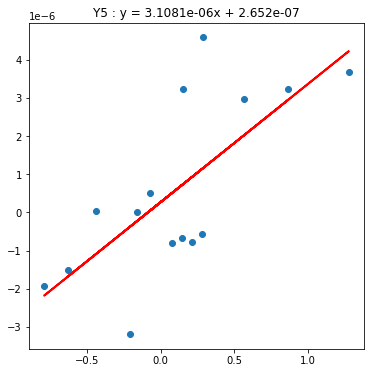

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义直线拟合函数
def linear_regression(x, y): 
    N = len(x)
    sumx = x.sum()
    sumy = y.sum()
    sumx2 = (x**2).sum()
    sumxy = (x*y).sum()

    A = np.mat([[N, sumx], [sumx, sumx2]])
    b = np.array([sumy, sumxy])
 
    return np.linalg.solve(A, b)

X,Y = np.array(xmn1),np.array(sum_lst)
a10, a11 = linear_regression(X, Y)
 
# 生成拟合直线的绘制点
_Y1 = np.array([a10 + a11 * x for x in X])

# 画图
fig = plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.plot(X, _Y1, 'red', linewidth=2) 
plt.title("Y5 : y = {}x + {}".format(round(a11,10), round(a10,10)))
#plt.title("y = {} + {}x".format(a10, a11)) # 标题
plt.show()
fig_name = ".\\figure\\Y5.png"
fig.savefig(fig_name)